# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.describe()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
count,27028.0,2.691300e+04,27028.000000,27028.000000,27028.000000,26711.000000,24121.000000,25455.000000,24930.000000,27028.000000,...,27028.000000,27028.0,27028.000000,27028.000000,27028.000000,2.702800e+04,27027.000000,27027.000000,27027.000000,27027.000000
mean,1.0,3.267629e+06,111037.796211,1.011396,26.093718,2.545318,795604.031591,1.053899,0.266506,110029.055720,...,0.999778,1.0,4.328437,0.648772,4.974952,7.367650e+05,-10.377988,-62.754987,179.111999,14702.799767
std,0.0,1.122677e+06,18102.751466,0.161679,6.387094,1.671248,283884.959287,1.170874,0.613909,36.036466,...,0.014898,0.0,2.930690,0.477363,2.067085,7.430325e+05,1.372942,1.269490,123.138365,13706.177751
min,1.0,1.531800e+04,110001.000000,1.000000,11.000000,1.000000,10205.000000,0.000000,0.000000,110000.000000,...,0.000000,1.0,1.000000,0.000000,1.000000,1.000000e+00,-13.499760,-65.329150,85.000000,459.978000
25%,1.0,2.496534e+06,110011.000000,1.000000,21.000000,1.000000,521125.000000,0.000000,0.000000,110012.000000,...,1.000000,1.0,2.000000,0.000000,4.000000,6.802750e+03,-11.433870,-63.831450,87.000000,3792.998000
50%,1.0,2.798484e+06,110020.000000,1.000000,26.000000,2.000000,999992.000000,1.000000,0.000000,110020.000000,...,1.000000,1.0,4.000000,1.000000,5.000000,1.364550e+04,-10.435950,-63.033270,153.000000,6896.648000
75%,1.0,3.970442e+06,110020.000000,1.000000,31.000000,5.000000,999992.000000,2.000000,0.000000,110028.000000,...,1.000000,1.0,5.000000,1.000000,5.000000,1.486846e+06,-8.768890,-61.945090,191.000000,34096.394000
max,1.0,9.659366e+06,520870.000000,4.000000,53.000000,9.000000,999994.000000,30.000000,28.000000,110180.000000,...,1.000000,1.0,11.000000,1.000000,9.000000,2.780269e+06,-8.768890,-60.138580,595.000000,34096.394000


In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
# Criar faixas de latitude
sinasc_raw['FaixaLat'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

In [7]:
# Usar pivot_table para calcular várias estatísticas
resultados_latitude = pd.pivot_table(sinasc_raw, index='FaixaLat', values=['QTDFILVIVO', 'QTDFILMORT'], aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
print(resultados_latitude)

                       sum                  mean                   min  \
                QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO QTDFILMORT   
FaixaLat                                                                 
Abaixo de -10.5     3105.0    12600.0   0.242521   0.980011        0.0   
Acima de -10.5      3538.0    14226.0   0.291770   1.129317        0.0   

                                  max                median             \
                QTDFILVIVO QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO   
FaixaLat                                                                 
Abaixo de -10.5        0.0       28.0       30.0        0.0        1.0   
Acima de -10.5         0.0        9.0       12.0        0.0        1.0   

                       std                   var             
                QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO  
FaixaLat                                                     
Abaixo de -10.5   0.599430   1.138300   0.359317   1.295727  
Acima de -

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
# Criar faixas de área
sinasc_raw['FaixaArea'] = pd.cut(sinasc_raw['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])

In [9]:
# Usar groupby e agg para calcular várias estatísticas
resultados_area = sinasc_raw.groupby('FaixaArea')[['QTDFILVIVO', 'QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
print(resultados_area)

               QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
FaixaArea                                                                   
Abaixo de 3000     4773.0  0.924284  0.0  30.0    1.0  1.075442  1.156575   
Acima de 3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
FaixaArea                                                                  
Abaixo de 3000     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838  
Acima de 3000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
# Criar faixas na variável munResAlt
faixas_altura = [-float('inf'), 150, 160, 170, float('inf')]
sinasc_raw['FaixaAltura'] = pd.cut(sinasc_raw['munResAlt'], bins=faixas_altura)

In [11]:
# Usar groupby e agg para calcular várias estatísticas
resultados_altura = sinasc_raw.groupby('FaixaAltura')[['CONSULTAS', 'APGAR5']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
print(resultados_altura)

               CONSULTAS                                               \
                     sum      mean min max median       std       var   
FaixaAltura                                                             
(-inf, 150.0]      42916  3.404141   1   9    4.0  0.920956  0.848160   
(150.0, 160.0]     13184  3.692997   1   9    4.0  0.649056  0.421273   
(160.0, 170.0]      4944  3.806005   1   9    4.0  0.547521  0.299779   
(170.0, inf]       35618  3.729243   1   9    4.0  0.605198  0.366264   

                  APGAR5                                                  
                     sum      mean  min   max median       std       var  
FaixaAltura                                                               
(-inf, 150.0]   115275.0  9.200654  0.0  10.0    9.0  0.784262  0.615067  
(150.0, 160.0]   33010.0  9.254275  1.0  10.0    9.0  0.807698  0.652376  
(160.0, 170.0]   11752.0  9.053929  1.0  10.0    9.0  0.770617  0.593851  
(170.0, inf]     87102.0  9.139769  0.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [14]:
Imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Buritis": "Porto Velho",
    "Cacaulândia": "Porto Velho",
    "Campo Novo de Rondônia": "Porto Velho",
    "Cujubim": "Porto Velho",
    "Monte Negro": "Porto Velho",
    "Rio Crespo": "Porto Velho",
    "Jaru": "Porto Velho",
    "Governador Jorge Teixeira": "Porto Velho",
    "Machadinho D'Oeste": "Porto Velho",
    "Theobroma": "Porto Velho",
    "Vale do Anari": "Porto Velho",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Ji-Paraná",
    "Alto Alegre dos Parecis": "Ji-Paraná",
    "Castanheiras": "Ji-Paraná",
    "Espigão D'Oeste": "Ji-Paraná",
    "Ministro Andreazza": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Ji-Paraná",
    "Novo Horizonte do Oeste": "Ji-Paraná",
    "Parecis": "Ji-Paraná",
    "Pimenta Bueno": "Ji-Paraná",
    "Primavera de Rondônia": "Ji-Paraná",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Ji-Paraná",
    "São Felipe D'Oeste": "Ji-Paraná",
    "Vilhena": "Ji-Paraná",
    "Cabixi": "Ji-Paraná",
    "Cerejeiras": "Ji-Paraná",
    "Chupinguaia": "Ji-Paraná",
    "Colorado do Oeste": "Ji-Paraná",
    "Corumbiara": "Ji-Paraná",
    "Pimenteiras do Oeste": "Ji-Paraná"
}

In [15]:
# Adicionar coluna de região imediata ao DataFrame
sinasc_raw['RegiaoImediata'] = sinasc_raw['munResNome'].map(Imediatas)

In [16]:
# Converter a coluna 'DTNASC' para o formato datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

In [17]:
# Criar colunas de ano e mês
sinasc_raw['Ano'] = sinasc_raw['DTNASC'].dt.year
sinasc_raw['Mes'] = sinasc_raw['DTNASC'].dt.month

In [20]:
# Calcular a idade média das mulheres para cada mês e região imediata
idade_media = sinasc_raw.groupby(['Mes', 'RegiaoImediata'])['IDADEMAE'].mean().reset_index()

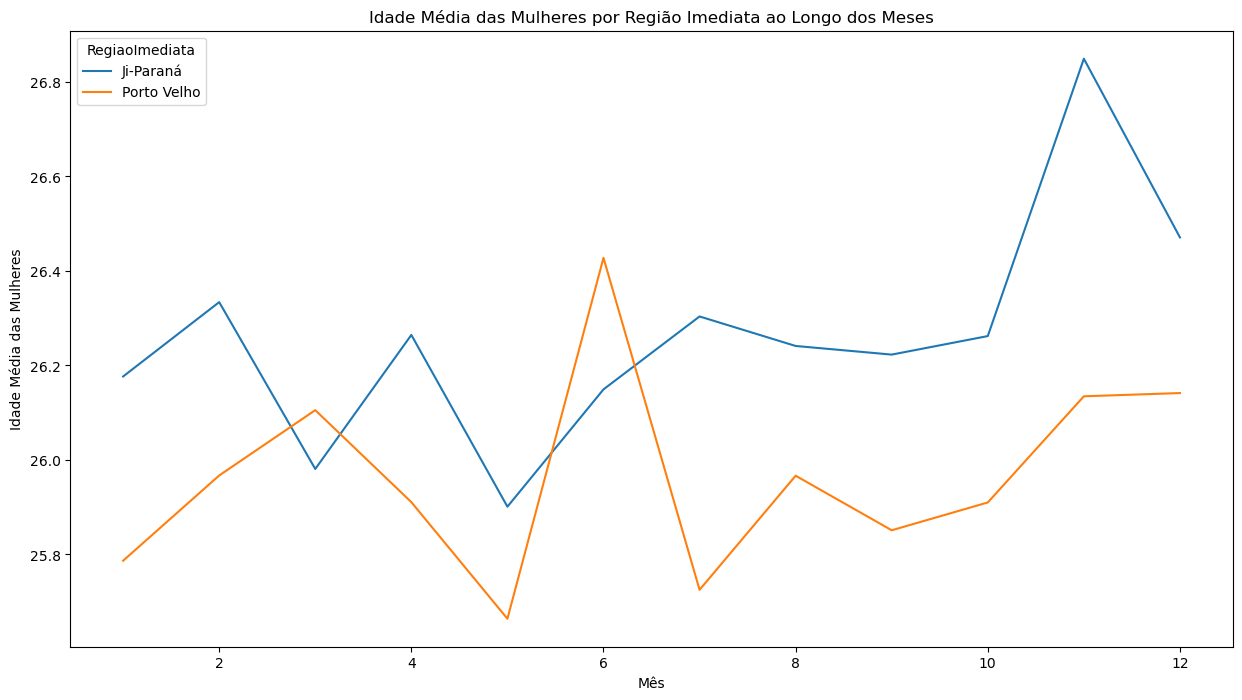

In [21]:
# Plotar o gráfico
plt.figure(figsize=(15, 8))
sns.lineplot(data=idade_media, x='Mes', y='IDADEMAE', hue='RegiaoImediata')
plt.title('Idade Média das Mulheres por Região Imediata ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Idade Média das Mulheres')
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [26]:
# Criar um DataFrame com os dados fornecidos
dados_idh = pd.DataFrame({
    'Município': ['Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim de Moura', 'Cerejeiras', 'Jaru', 'Colorado do Oeste',
                  'Ouro Preto do Oeste', 'Espigão d\'Oeste', 'Santa Luzia d\'Oeste', 'Pimenteiras do Oeste', 'Presidente Médici', 'Castanheiras', 'Guajará-Mirim',
                  'Chupinguaia', 'Cabixi', 'Candeias do Jamari', 'São Felipe d\'Oeste', 'Cacaulândia', 'São Miguel do Guaporé', 'Mirante da Serra', 'Alvorada d\'Oeste',
                  'Teixeirópolis', 'Nova Brasilândia d\'Oeste', 'Rio Crespo', 'Primavera de Rondônia', 'Alta Floresta d\'Oeste', 'Ministro Andreazza', 'Novo Horizonte do Oeste',
                  'Vale do Paraíso', 'Alto Paraíso', 'Parecis', 'Buritis', 'Itapuã do Oeste', 'Corumbiara', 'Cujubim', 'Costa Marques', 'São Francisco do Guaporé', 'Urupá',
                  'Monte Negro', 'Seringueiras', 'Governador Jorge Teixeira', 'Machadinho d\'Oeste', 'Campo Novo de Rondônia', 'Alto Alegre dos Parecis', 'Theobroma',
                  'Nova União', 'Nova Mamoré', 'Vale do Anari'],
    'IDH-municipal': [0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700, 0.692, 0.689, 0.685, 0.682, 0.672, 0.670, 0.665, 0.664, 0.658, 0.657, 0.652, 0.650, 0.649, 0.649,
                      0.646, 0.646, 0.643, 0.643, 0.643, 0.643, 0.643, 0.641, 0.641, 0.638, 0.634, 0.627, 0.625, 0.617, 0.616, 0.614, 0.613, 0.612, 0.611, 0.611, 0.609, 0.607,
                      0.598, 0.596, 0.596, 0.593, 0.592, 0.589, 0.587, 0.587, 0.584]
})

In [27]:
# Criar faixas de IDH
faixas_idh = [0, 0.499, 0.599, 0.699, 0.799, 1]
rotulos_idh = ['IDH muito baixo', 'IDH baixo', 'IDH médio', 'IDH alto', 'IDH muito alto']

In [28]:
# Adicionar coluna de faixas de IDH ao DataFrame
dados_idh['Faixa_IDH'] = pd.cut(dados_idh['IDH-municipal'], bins=faixas_idh, labels=rotulos_idh, right=False)

In [29]:
# Agrupar por faixas de IDH e calcular estatísticas
estatisticas_idh = dados_idh.groupby('Faixa_IDH')['IDH-municipal'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']).reset_index()

In [30]:
# Exibir o resultado
print(estatisticas_idh)

         Faixa_IDH     sum      mean    min    max  median       std       var
0  IDH muito baixo   0.000       NaN    NaN    NaN     NaN       NaN       NaN
1        IDH baixo   5.322  0.591333  0.584  0.598   0.592  0.004848  0.000023
2        IDH médio  23.157  0.643250  0.607  0.692   0.643  0.024046  0.000578
3         IDH alto   5.011  0.715857  0.700  0.736   0.714  0.013668  0.000187
4   IDH muito alto   0.000       NaN    NaN    NaN     NaN       NaN       NaN


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [31]:
# Criar um DataFrame com os dados fornecidos
dados_ifdm = pd.DataFrame({
    'Município': ['Ariquemes', 'Vilhena', 'Pimenta Bueno', 'Porto Velho', 'Ji-Paraná', 'Cacoal', 'Santa Luzia d\'Oeste', 'Rolim de Moura', 'Chupinguaia', 'São Miguel do Guaporé',
                  'Pimenteiras do Oeste', 'Teixeirópolis', 'Colorado do Oeste', 'Jaru', 'Rio Crespo', 'Primavera de Rondônia', 'Alta Floresta d\'Oeste', 'Ouro Preto do Oeste', 'São Francisco do Guaporé',
                  'Candeias do Jamari', 'Buritis', 'São Felipe d\'Oeste', 'Presidente Médici', 'Cerejeiras', 'Monte Negro', 'Urupá', 'Espigão d\'Oeste', 'Seringueiras', 'Alvorada d\'Oeste',
                  'Itapuã do Oeste', 'Cabixi', 'Novo Horizonte do Oeste', 'Nova Brasilândia d\'Oeste', 'Vale do Paraíso', 'Corumbiara', 'Alto Paraíso', 'Cacaulândia', 'Vale do Anari', 'Ministro Andreazza',
                  'Costa Marques', 'Nova União', 'Guajará-Mirim', 'Mirante da Serra', 'Parecis', 'Castanheiras', 'Theobroma', 'Machadinho d\'Oeste', 'Campo Novo de Rondônia', 'Nova Mamoré', 'Cujubim',
                  'Alto Alegre dos Parecis', 'Governador Jorge Teixeira'],
    'IFDM': [0.7746, 0.7465, 0.7383, 0.7257, 0.7117, 0.7111, 0.6850, 0.6785, 0.6766, 0.6699, 0.6501, 0.6500, 0.6473, 0.6450, 0.6430, 0.6384, 0.6337, 0.6261, 0.6214, 0.6199,
             0.6199, 0.6153, 0.6140, 0.6137, 0.6016, 0.6006, 0.5973, 0.5922, 0.5919, 0.5903, 0.5887, 0.5858, 0.5857, 0.5818, 0.5759, 0.5735, 0.5721, 0.5710, 0.5657, 0.5626,
             0.5571, 0.5541, 0.5519, 0.5502, 0.5430, 0.5405, 0.5322, 0.5272, 0.5084, 0.5055, 0.5046, 0.4562]
})


In [32]:
# Criar faixas de IFDM
faixas_ifdm = [0, 0.4, 0.6, 0.8, 1]
rotulos_ifdm = ['Baixo', 'Regular', 'Moderado', 'Alto']

In [33]:
# Adicionar coluna de faixas de IFDM ao DataFrame
dados_ifdm['Faixa_IFDM'] = pd.cut(dados_ifdm['IFDM'], bins=faixas_ifdm, labels=rotulos_ifdm, right=False)

In [34]:
# Agrupar por faixas de IFDM e calcular estatísticas
estatisticas_ifdm = dados_ifdm.groupby('Faixa_IFDM')['IFDM'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']).reset_index()
print(estatisticas_ifdm)

  Faixa_IFDM      sum      mean     min     max   median       std       var
0      Baixo   0.0000       NaN     NaN     NaN      NaN       NaN       NaN
1    Regular  14.4654  0.556362  0.4562  0.5973  0.56415  0.034401  0.001183
2   Moderado  17.1579  0.659919  0.6006  0.7746  0.64615  0.048485  0.002351
3       Alto   0.0000       NaN     NaN     NaN      NaN       NaN       NaN


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [35]:
# Criar um DataFrame com os dados fornecidos
dados_pib = pd.DataFrame({
    'Município': ['Porto Velho', 'Ji-Paraná', 'Vilhena', 'Ariquemes', 'Cacoal', 'Jaru', 'Rolim de Moura', 'Pimenta Bueno', 'Guajará-Mirim', 'Ouro Preto do Oeste',
                  'Buritis', 'Machadinho do Oeste', 'Espigão d\'Oeste', 'São Miguel do Guaporé', 'Candeias do Jamari', 'Nova Mamoré', 'Cerejeiras', 'Alta Floresta do Oeste',
                  'Presidente Médici', 'Cujubim', 'Nova Brasilândia do Oeste', 'Alto Paraíso', 'São Francisco do Guaporé', 'Colorado do Oeste', 'Monte Negro',
                  'Alto Alegre dos Parecis', 'Campo Novo de Rondônia', 'Alvorada do Oeste', 'Chupinguaia', 'Corumbiara', 'Ministro Andreazza', 'Urupá', 'Costa Marques',
                  'Seringueiras', 'Mirante da Serra', 'Governador Jorge Teixeira', 'Theobroma', 'Santa Luzia do Oeste', 'Novo Horizonte do Oeste', 'Itapuã do Oeste',
                  'Vale do Paraíso', 'Cacaulândia', 'Cabixi', 'Vale do Anari', 'Nova União', 'Parecis', 'Rio Crespo', 'Pimenteiras do Oeste', 'Teixeirópolis', 'São Felipe do Oeste',
                  'Castanheiras', 'Primavera de Rondônia'],
    'PIB': [17912070, 3783972, 2831175, 2579830, 2261644, 1500890, 1283434, 1164877, 893000, 834000, 726000, 633000, 625000, 616000, 548000, 529000, 507000, 496000, 428000,
            385000, 360000, 358000, 353000, 335000, 219152, 213410, 208821, 204098, 190331, 188218, 174633, 172143, 171878, 169429, 163955, 148027, 140601, 135934, 129399,
            129351, 116742, 116635, 113031, 105208, 92346, 80759, 76854, 76756, 72089, 72084, 59779, 52908]
})

In [47]:
# Criar faixas de PIB
faixas_pib = [0, 100000, 200000, 300000, 500000, 1000000, float('inf')]
rotulos_pib = ['Até 100 Milhões', 'Acima de 100 Milhões', 'Acima de 200 Milhões', 'Acima de 300 Milhões', 'Acima de 500 Milhões', 'Acima de 1 Bilhão']

In [48]:
# Adicionar coluna de faixas de PIB ao DataFrame
dados_pib['Faixa_PIB'] = pd.cut(dados_pib['PIB'], bins=faixas_pib, labels=rotulos_pib, right=False)

In [49]:
# Agrupar por faixas de PIB e calcular estatísticas
estatisticas_pib = dados_pib.groupby('Faixa_PIB')['PIB'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']).reset_index()
print(estatisticas_pib)

              Faixa_PIB       sum          mean      min       max     median  \
0       Até 100 Milhões    583575  7.294688e+04    52908     92346    74422.5   
1  Acima de 100 Milhões   2365515  1.478447e+05   105208    190331   144314.0   
2  Acima de 200 Milhões    845481  2.113702e+05   204098    219152   211115.5   
3  Acima de 300 Milhões   2715000  3.878571e+05   335000    496000   360000.0   
4  Acima de 500 Milhões   5911000  6.567778e+05   507000    893000   625000.0   
5     Acima de 1 Bilhão  33317892  4.164736e+06  1164877  17912070  2420737.0   

            std           var  
0  1.220983e+04  1.490801e+08  
1  2.815915e+04  7.929379e+08  
2  6.431706e+03  4.136684e+07  
3  5.625960e+04  3.165143e+09  
4  1.350146e+05  1.822894e+10  
5  5.624479e+06  3.163477e+13  


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

1. O município com o maior Índice de Desenvolvimento Humano no estado de Rondônia era Porto Velho, com um índice de 0,736 (considerado alto), e o município com o menor índice foi Vale do Anari, com um índice de 0,584 (considerado baixo). De todos os municípios do estado, nenhum município registrou um IDH muito alto, enquanto 7 apresentaram um IDH alto, 36 municípios IDH médio, 9 IDH baixo, e nenhum município IDH muito baixo

2. O município com o maior Índice FIRJAN de Desenvolvimento Municipal no estado de Rondônia era Ariquemes, com um índice de 0,7746 (considerado Moderado), e o município com o menor índice foi Governador Jorge Teixeira, com um índice de 0,4562 (considerado baixo). De todos os municípios do estado, nenhum município registrou um desenvolvimento alto, enquanto 27 apresentaram um desenvolvimento moderado, 25 municípios desenvolvimento regular, e nenhum município desenvolvimento baixo

3. O município com o maior PIB no estado de Rondônia era Porto Velho, com um PIB de 17,912,070,000 (Acima de 1 Bilhão), e o município com o menor PIB foi Primavera de Rondônia, com PIB de 52,908,000 (Até 100 Milhões). De todos os municípios do estado, 8 municípios tem um PIB acima de 1 Bilhão, 9 municípios tem um PIB acima de 500 Milhões, 7 municípios tem um PIB acima de 300 Milhões, 4 municípios tem um PIB acima de 200 Milhões, 15 municípios tem um PIB acima de 100 Milhões, 8  municípios tem um PIB Até 100 Milhões.